In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn

Quote from Cathy:  

```
You don't need a tutorial on seaborn, that's the magic of seaborn: you don't need to know what you are doing.
```

Seaborn's great ability is to plot multi-dimensional data cleanly and intuitively.

Seaborn has several styles of plot:

- sns.scatterplot
- sns.distplot
- sns.lineplot
- sns.barplot
- sns.violinplot
- sns.boxplot
- sns.swarmplot
- sns.stripplot
- sns.jointplot

Before we look at the various plot types, take note of the imported the packages in the first code cell above. Seaborn depends on `Matplotlib`, so we import it along with seaborn. We also import seaborn as `sns`. This convention is standard accross all seaborn documentation, so it's a good idea to get in the habbit of importing the packages this way.


# Load Data

Load the data from up-to-date online sources, combine them into a single dataframe

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/richard-alexander/Data_Science_Course/master/Seaborn/AllStates.csv', index_col=0)
midwest_df=pd.read_csv('https://raw.githubusercontent.com/richard-alexander/Data_Science_Course/master/Seaborn/Midwest.csv', index_col=0)

View each dataframe.

In [3]:
df.head()

,date,state,Population,Per100kDeath,Per100kTests,Per100kDeathCumulative,Per100kTestsCumulative,Date,DateTime
12081,20200122,WA,6724540.0,0.0,0.000000,0.0,0.000000,122,2020-01-22
12080,20200122,MA,6547629.0,0.0,0.000000,0.0,0.015273,122,2020-01-22
12079,20200123,WA,6724540.0,0.0,0.000000,0.0,0.000000,123,2020-01-23
12078,20200123,MA,6547629.0,0.0,0.015273,0.0,0.030545,123,2020-01-23
12077,20200124,WA,6724540.0,0.0,0.000000,0.0,0.000000,124,2020-01-24


In [18]:
midwest_df.head()

,date,state,Population,Per100kDeath,Per100kTests,Per100kDeathCumulative,Per100kTestsCumulative,Date,DateTime
24,20201005,MI,9883640.0,0.151766,551.952520,72.230474,38637.860141,5,2020-10-05
18,20201005,KS,2853118.0,0.280395,350.108197,24.744858,18965.426596,5,2020-10-05
17,20201005,IN,6483802.0,0.107961,109.688729,56.772246,21980.544748,5,2020-10-05
16,20201005,IL,12830632.0,0.109114,300.359328,70.565503,46199.555875,5,2020-10-05
14,20201005,IA,3046355.0,0.229783,80.325504,45.595474,25867.438299,5,2020-10-05


# Using hue, size, and facets for multi-dimensions

<AxesSubplot:xlabel='DateTime', ylabel='Per100kDeathCumulative'>

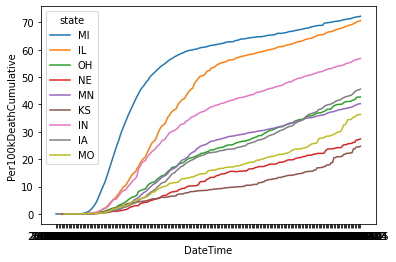

In [5]:
sns.lineplot(data=midwest_df, x='DateTime', y='Per100kDeathCumulative', hue='state')

We simply give it the dataframe, tell it what column from that dataframe we want on the x-axis, tell it what column we want on the y-axis, and since we have data for each state, tell it to color code the line based on the state column. 

Use matplotlib figure commands for making the canvas bigger.  We can also add a 4th dimension using the size argument.

<AxesSubplot:xlabel='Per100kTestsCumulative', ylabel='Per100kDeathCumulative'>

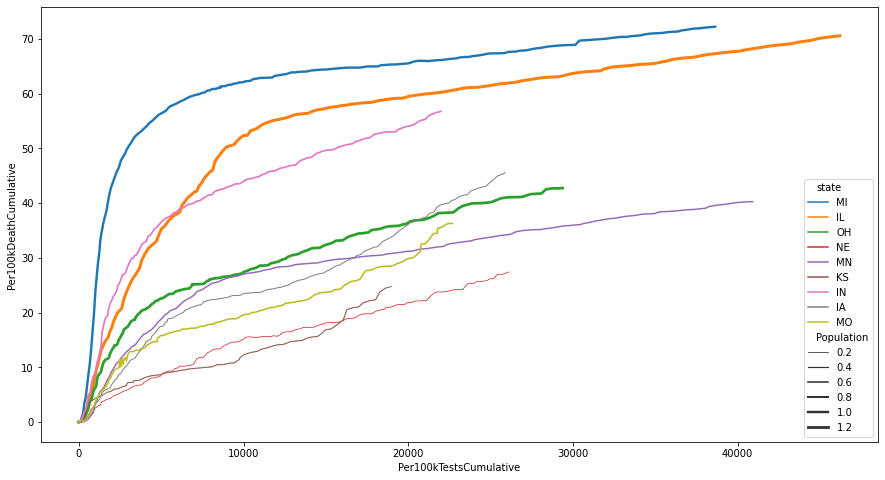

In [6]:
plt.figure(figsize=[15,8])
sns.lineplot(data=midwest_df, y='Per100kDeathCumulative', x='Per100kTestsCumulative', size='Population', hue='state')

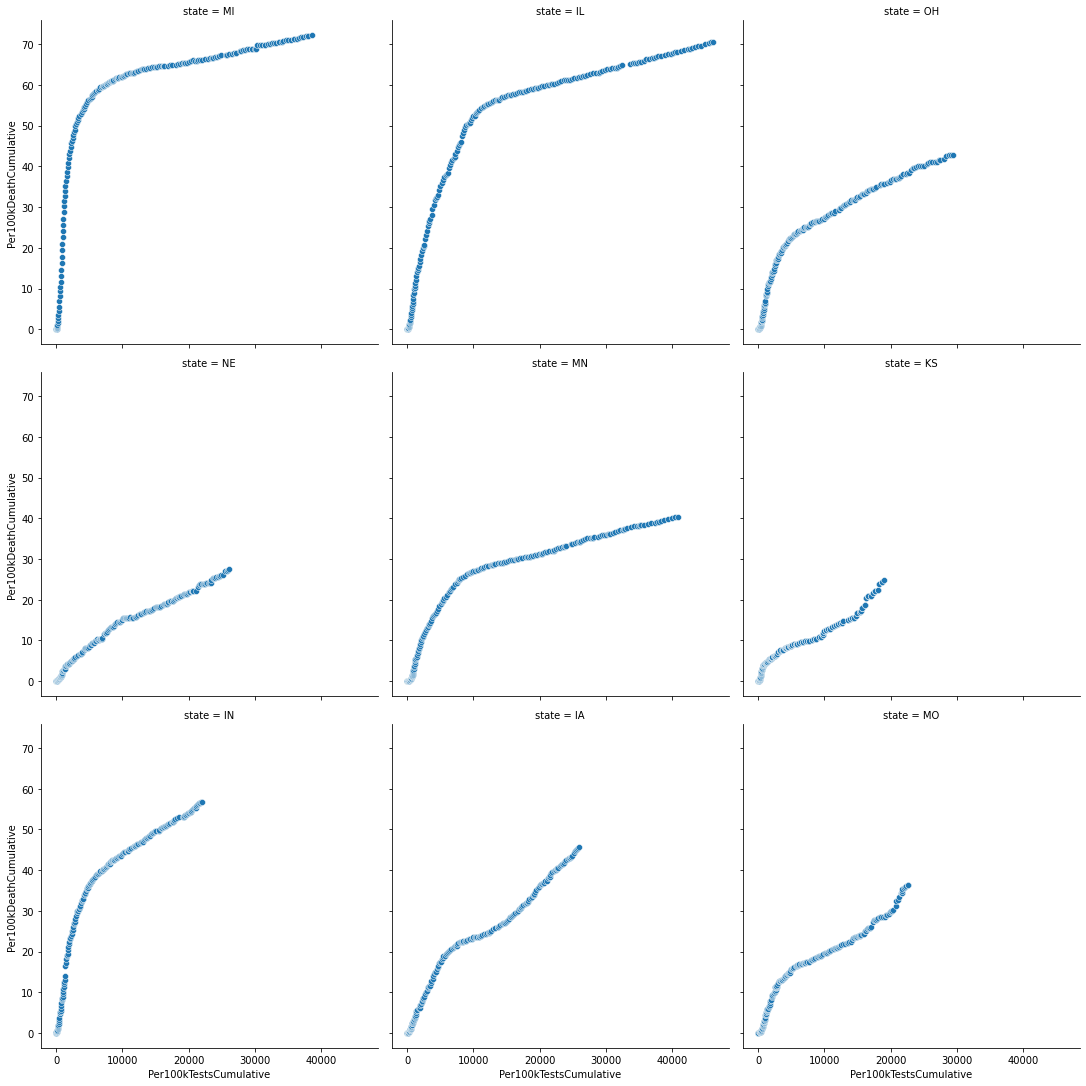

In [7]:
sns.relplot(data=midwest_df, col='state', col_wrap=3, x='Per100kTestsCumulative', y='Per100kDeathCumulative')

Next we will aggregate to get just the final, most recent cumulative testing and death figures.  

With this we will make a simple scatterplot, but size each point by its population.  We will also scale the axes to log scale using a matplotlib command.

[None, None]

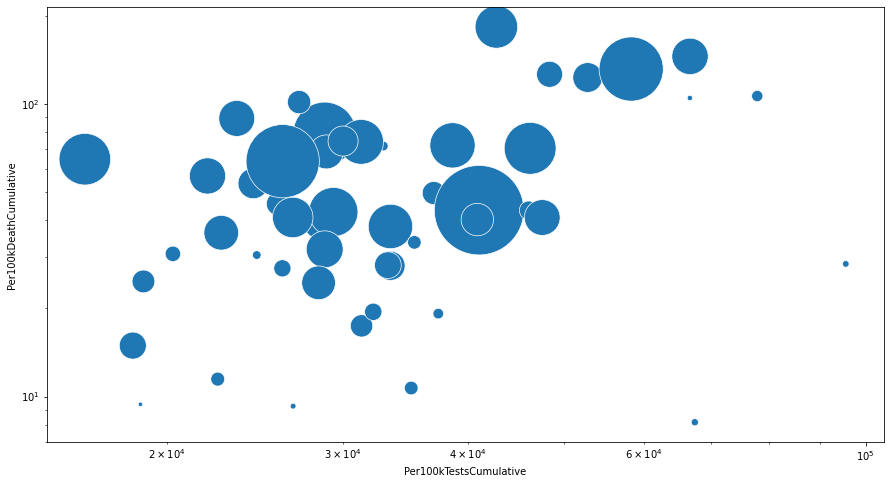

In [8]:
most_recent_df=df.groupby(['state']).agg({'Per100kDeathCumulative':np.max, 'Per100kTestsCumulative':np.max, 'Population':np.max}).reset_index().dropna()

fig=plt.figure(figsize=[15,8])
sns.scatterplot(data=most_recent_df, y='Per100kDeathCumulative', x='Per100kTestsCumulative', size='Population', sizes=(20,8000)).legend_.remove()
fig.gca().set(xscale='log', yscale='log')

# Using seaborn for statistical displays

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/richard-alexander/Data_Science_Course/master/Seaborn/WormDataset.csv', index_col=0)
df['Time']=df['Time'].astype(str)


Thus far we have used multi-dimensions so that for each X/Y/hue/size pair there was only a single data point.  But in biology we frequently have replicates where each condition/time point has multiple measurements.  This is where Seaborn really shines.

Here for instance, instead of having each state get broken out into its own color, we just want to know what the distribution is like over time.

<AxesSubplot:xlabel='Time', ylabel='TUNEL_Density'>

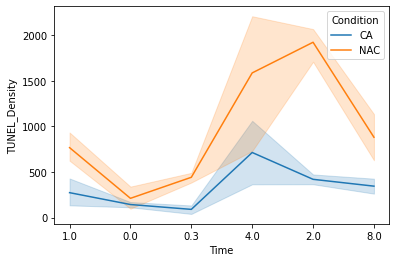

In [10]:
sns.lineplot(data=df, x='Time', y='TUNEL_Density', hue='Condition')

By default, this error is the 95% confidence interval of a bootstrap calculation.  Basically it resamples your data lots of times, finds the means for each of those times, and plots the point at which 95% of those means are higher/lower.  Alternatively you can use ci='sd' or ci=68.  The former just plots the standard deviation of all points matching that x/y combination.  The second gives you the standard error of the mean IF your data is normally distributed.

<AxesSubplot:xlabel='Time', ylabel='TUNEL_Density'>

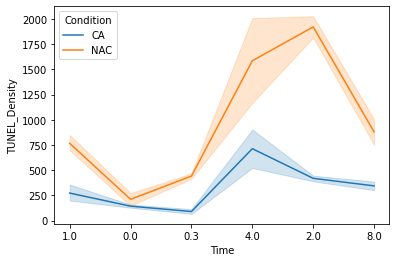

In [11]:
sns.lineplot(data=df, x='Time', y='TUNEL_Density', hue='Condition', ci=68)

For many things this would be enough, but it is more fun to look at distributions.  Here we use a standard box plot.

<AxesSubplot:xlabel='Time', ylabel='TUNEL_Density'>

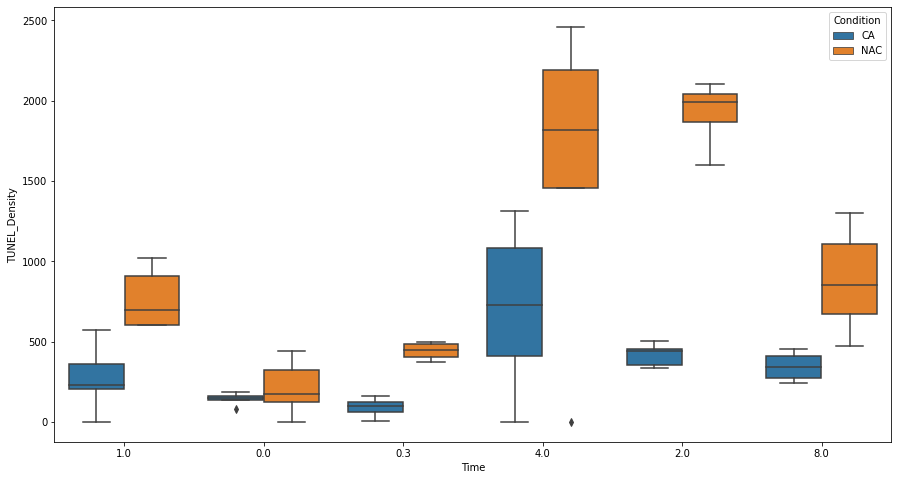

In [12]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df, x='Time', y='TUNEL_Density', hue='Condition')


We can also overlay simply by calling another plot.  Here we will try a violin plot with the individual points overlaid in a swarmplot.

c:\users\seancatjohn\anaconda3\envs\course\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Time', ylabel='H3p_Density'>

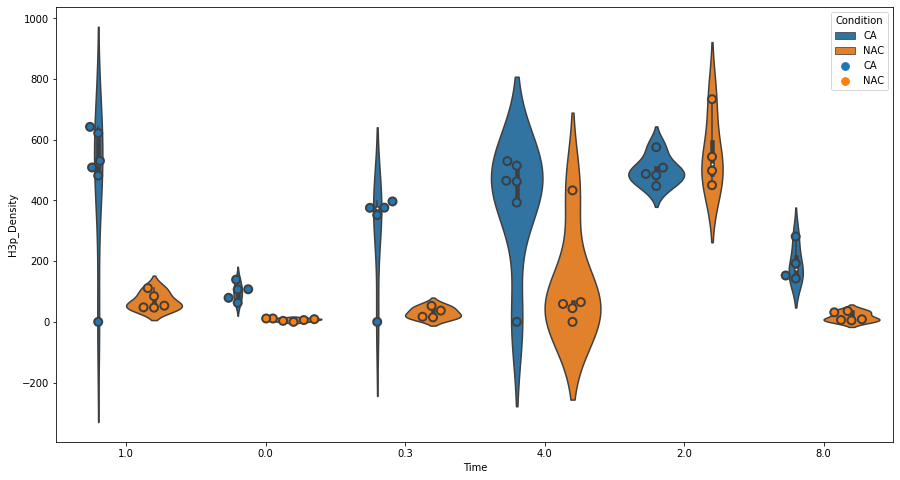

In [13]:
plt.figure(figsize=[15,8])
sns.violinplot(data=df, x='Time', y='H3p_Density', hue='Condition')
sns.swarmplot(data=df, x='Time', y='H3p_Density', hue='Condition', dodge=True, linewidth=2, size=8)

But my favorite is usually a bar plot with a strip plot, here the problem is very obvious:  some zero-valued data points are skewing our errors.

<AxesSubplot:xlabel='Time', ylabel='TUNEL_Density'>

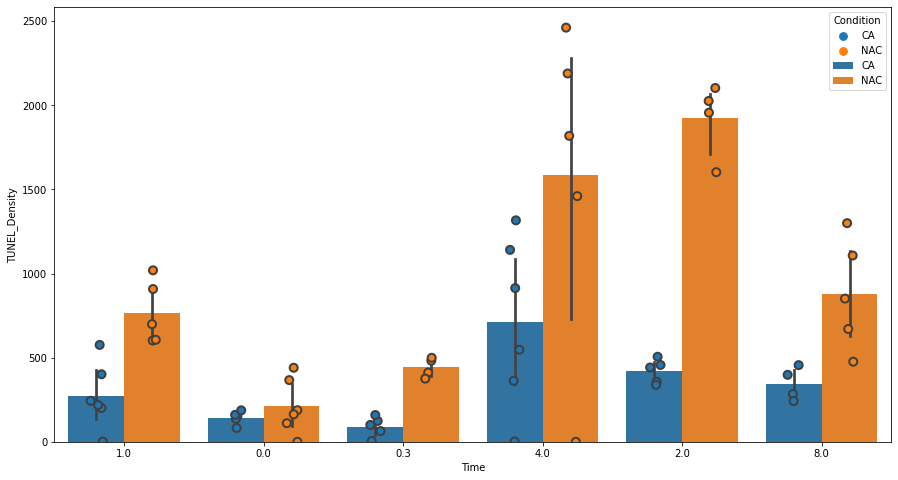

In [14]:
plt.figure(figsize=[15,8])
sns.barplot(data=df, x='Time', y='TUNEL_Density', hue='Condition')
sns.stripplot(data=df, x='Time', y='TUNEL_Density', hue='Condition', dodge=True, linewidth=2, size=8)

Sometimes it is easier to see just breaking things out and laying them side by side.  If we had more than 2 categories it would be tricky to see the relationships.  relplot and catplot still work, even in cases of replicate measurements.

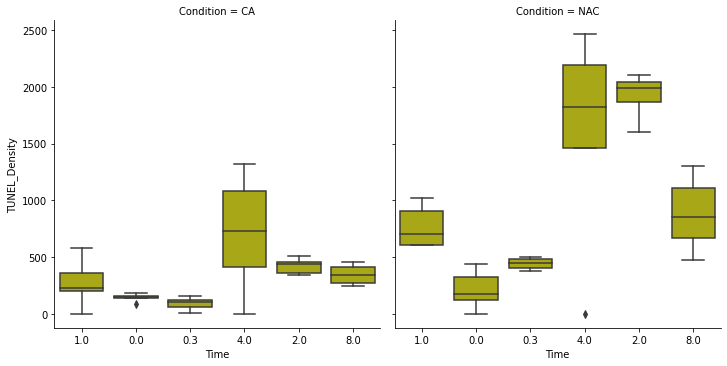

In [15]:
sns.catplot(data=df, x='Time', y='TUNEL_Density', col='Condition', kind='box', color='y')


So far we have talked only about dying (TUNEL) stained, what about looking at dividing (H3p) cells at the same time?

<AxesSubplot:xlabel='Time', ylabel='H3p_Density'>

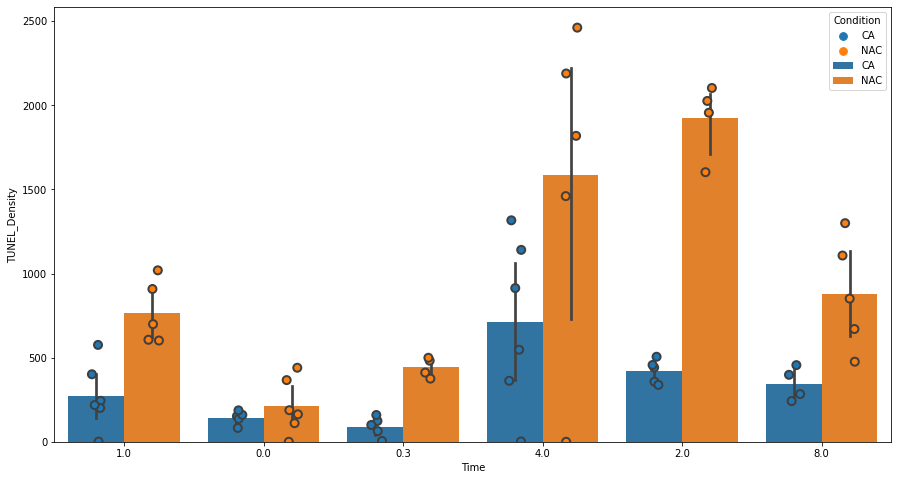

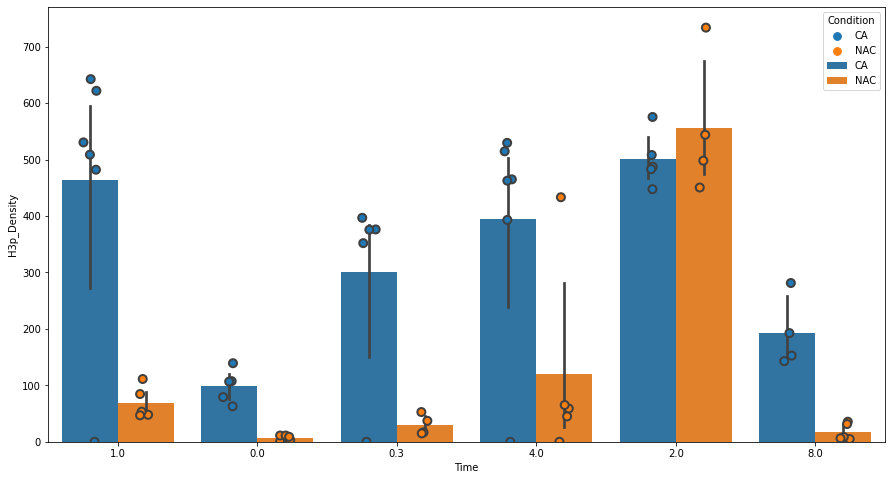

In [16]:
plt.figure(figsize=[15,8])
sns.barplot(data=df, x='Time', y='TUNEL_Density', hue='Condition')
sns.stripplot(data=df, x='Time', y='TUNEL_Density', hue='Condition', dodge=True, linewidth=2, size=8)

plt.figure(figsize=[15,8])
sns.barplot(data=df, x='Time', y='H3p_Density', hue='Condition')
sns.stripplot(data=df, x='Time', y='H3p_Density', hue='Condition', dodge=True, linewidth=2, size=8)

Alternatively we could use melt to turn TUNEL_Density and H3p_Density into a single variable:  Density, then use this in a relplot.

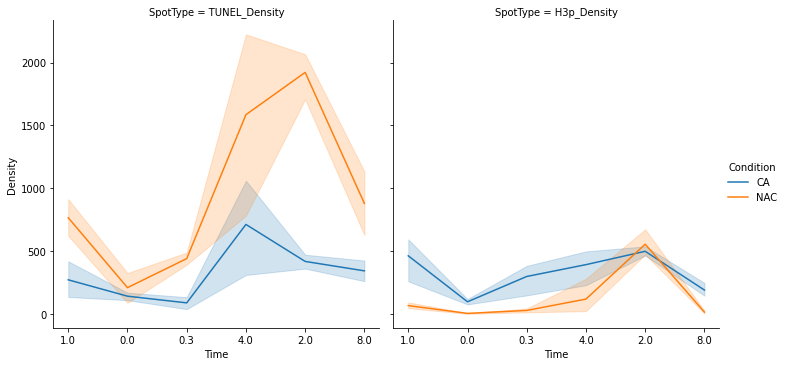

In [17]:
melted_df=df.melt(id_vars=['Time', 'Condition'], value_vars=['TUNEL_Density', 'H3p_Density'], 
                  var_name='SpotType', value_name='Density')
sns.relplot(data=melted_df, x='Time', y='Density', hue='Condition', col='SpotType', kind='line')